In [ ]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggl

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 98% 220M/225M [00:01<00:00, 131MB/s]
100% 225M/225M [00:01<00:00, 122MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/flowers-recognition.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!rm -r /content/flowers/dandelion
!rm -r /content/flowers/daisy
!rm -r /content/flowers/tulip

In [ ]:
#Fetch Image count from Folders

In [ ]:
count = 0
dirs = os.listdir('/content/flowers/')
for dir in dirs:
    files = list(os.listdir('/content/flowers/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

rose Folder has 784 Images
sunflower Folder has 733 Images
Images Folder has 1517 Images


In [ ]:
#Load Images into Arrays as Dataset

In [ ]:
base_dir = '/content/flowers/'
img_size = 180
batch = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 1517 files belonging to 2 classes.
Using 1214 files for training.
Found 1517 files belonging to 2 classes.
Using 303 files for validation.


In [ ]:
flower_names = train_ds.class_names
flower_names

['rose', 'sunflower']

In [ ]:
import matplotlib.pyplot as plt

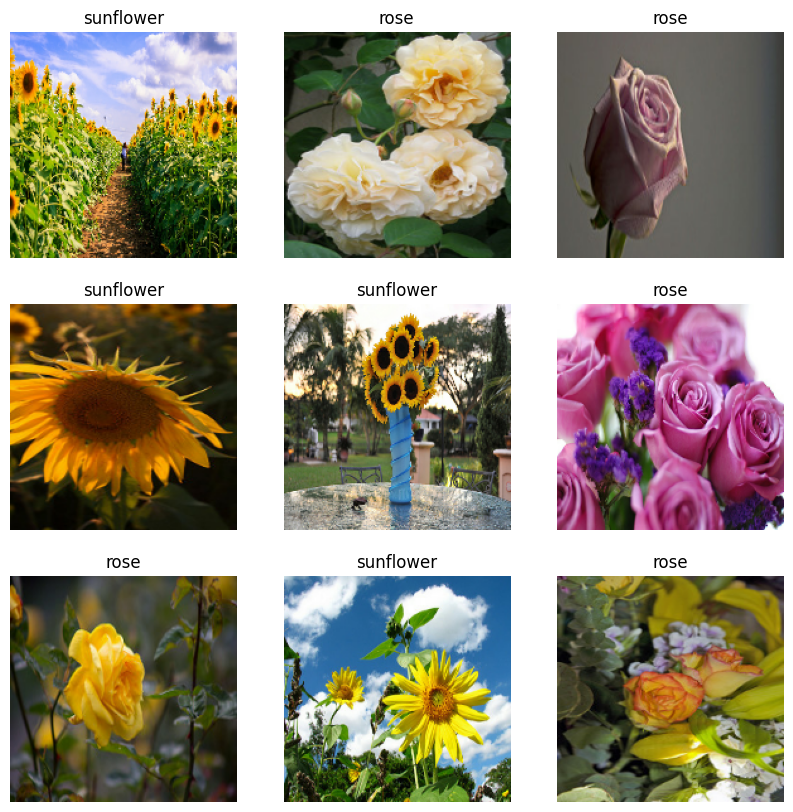

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
#Data Augmentation

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

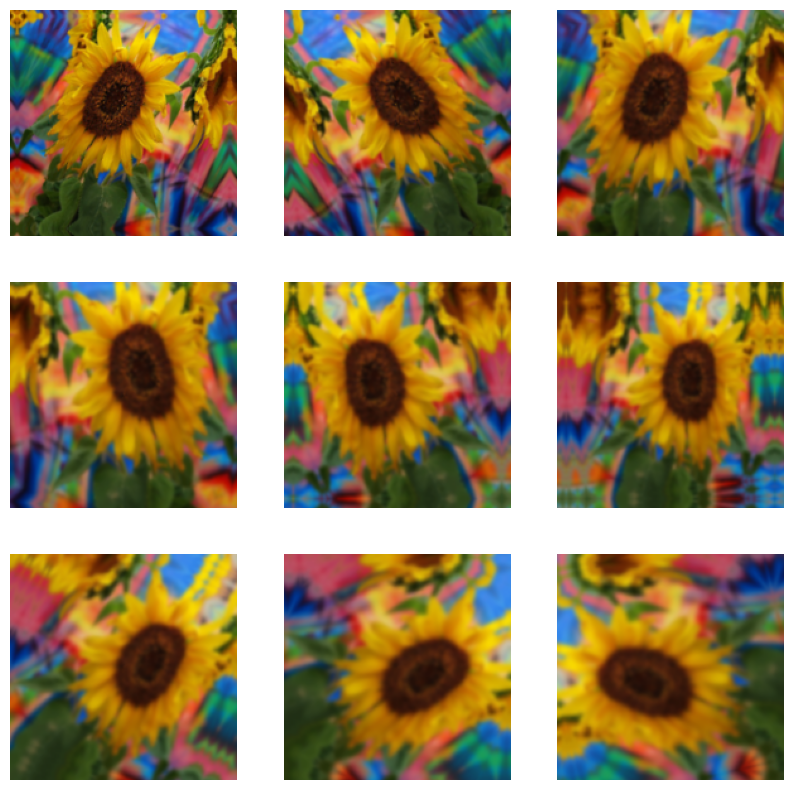

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
#Model Creation

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
38/38 [==============================] - 54s 1s/step - loss: 0.7533 - accuracy: 0.6878 - val_loss: 0.3365 - val_accuracy: 0.8581
Epoch 2/15
38/38 [==============================] - 51s 1s/step - loss: 0.2947 - accuracy: 0.8789 - val_loss: 0.3267 - val_accuracy: 0.8977
Epoch 3/15
38/38 [==============================] - 51s 1s/step - loss: 0.2669 - accuracy: 0.8970 - val_loss: 0.2741 - val_accuracy: 0.9043
Epoch 4/15
38/38 [==============================] - 48s 1s/step - loss: 0.2757 - accuracy: 0.8871 - val_loss: 0.3143 - val_accuracy: 0.8713
Epoch 5/15
38/38 [==============================] - 50s 1s/step - loss: 0.2273 - accuracy: 0.9201 - val_loss: 0.2489 - val_accuracy: 0.9142
Epoch 6/15
38/38 [==============================] - 50s 1s/step - loss: 0.2077 - accuracy: 0.9201 - val_loss: 0.2837 - val_accuracy: 0.8944
Epoch 7/15
38/38 [==============================] - 53s 1s/step - loss: 0.2072 - accuracy: 0.9185 - val_loss: 0.2602 - val_accuracy: 0.9010
Epoch 8/15
38/38 [==

In [ ]:
train_loss, train_accuracy = model.evaluate(train_ds)
print("Train Loss: ", train_loss*100)
print("Train Accuracy: ", train_accuracy*100)

38/38 [==============================] - 13s 335ms/step - loss: 0.1054 - accuracy: 0.9572
Train Loss:  10.543566197156906
Train Accuracy:  95.71663737297058


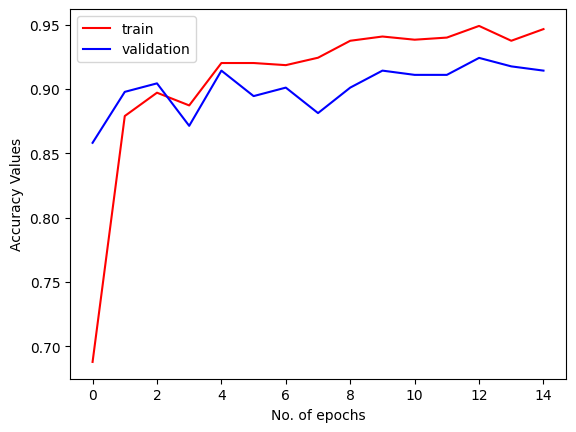

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Values")
plt.legend()
plt.show()

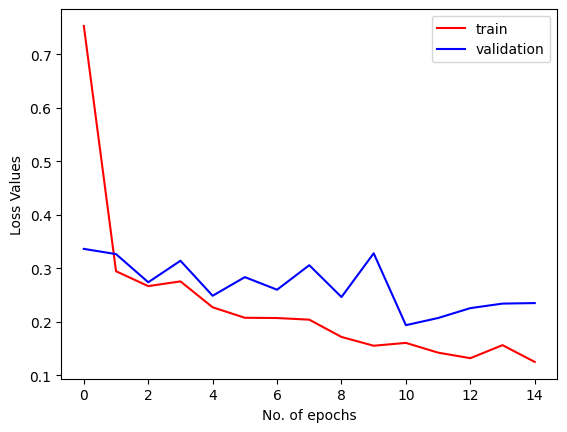

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.xlabel("No. of epochs")
plt.ylabel("Loss Values")
plt.legend()
plt.show()

In [ ]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

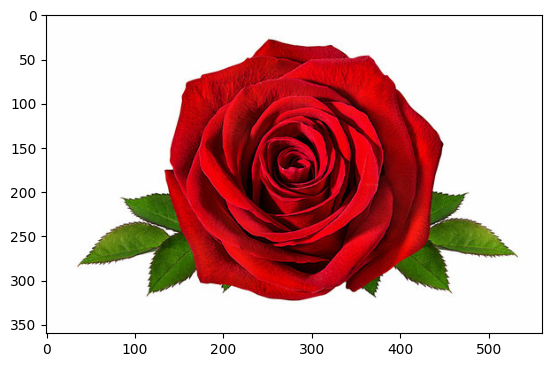

In [ ]:
image_path = "/content/rose.jpg"
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image)
# Display the image
plt.imshow(image)
plt.show()

In [ ]:
classify_images('/content/rose.jpg')

1/1 [==============================] - 0s 380ms/step


'The Image belongs to rose with a score of 100.0'

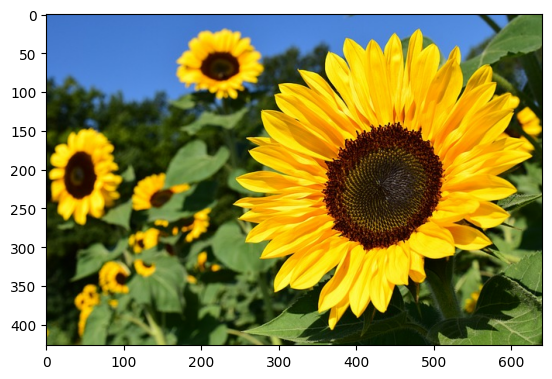

In [ ]:
image_path1 = "/content/sunflower.jpg"
image1 = tf.io.read_file(image_path1)
image1 = tf.image.decode_jpeg(image1)
# Display the image
plt.imshow(image1)
plt.show()

In [ ]:
classify_images('/content/sunflower.jpg')

1/1 [==============================] - 0s 33ms/step


'The Image belongs to rose with a score of 100.0'